In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
v

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification
License(s): CC0-1.0
 86% 73.0M/84.8M [00:00<00:00, 96.7MB/s]
100% 84.8M/84.8M [00:01<00:00, 84.8MB/s]


In [ ]:
import zipfile
local_zip = '/content/fruits-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./fruit-classification')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/fruits-classification.zip' mode='r'>>

In [ ]:
import os

In [ ]:
train_apple_dir = os.path.join('/content/fruit-classification/Fruits Classification/train/Apple')
train_banana_dir = os.path.join('/content/fruit-classification/Fruits Classification/train/Banana')
train_grape_dir = os.path.join('/content/fruit-classification/Fruits Classification/train/Grape')
train_mango_dir = os.path.join('/content/fruit-classification/Fruits Classification/train/Mango')
train_strawberry_dir = os.path.join('/content/fruit-classification/Fruits Classification/train/Strawberry')

In [ ]:
train_apple_dir_name = os.listdir(train_apple_dir)
train_banana_dir_name = os.listdir(train_banana_dir)
train_grape_dir_name = os.listdir(train_grape_dir)
train_mango_dir_name = os.listdir(train_mango_dir)
train_strawberry_dir_name = os.listdir(train_strawberry_dir)

In [ ]:
train_apple_dir_name

['Apple (299).jpeg',
 'Apple (625).jpeg',
 'Apple (1798).jpeg',
 'Apple (1865).jpeg',
 'Apple (39).jpeg',
 'Apple (1437).jpeg',
 'Apple (1199).jpeg',
 'Apple (1196).jpeg',
 'Apple (702).jpeg',
 'Apple (1324).jpeg',
 'Apple (587).jpeg',
 'Apple (170).jpeg',
 'Apple (1391).jpeg',
 'Apple (212).jpeg',
 'Apple (542).jpeg',
 'Apple (934).jpeg',
 'Apple (194).jpeg',
 'Apple (29).jpeg',
 'Apple (1672).jpeg',
 'Apple (1971).jpeg',
 'Apple (1198).jpeg',
 'Apple (1134).jpeg',
 'Apple (505).jpeg',
 'Apple (1277).jpeg',
 'Apple (866).jpeg',
 'Apple (859).jpeg',
 'Apple (340).jpeg',
 'Apple (673).jpeg',
 'Apple (1759).jpeg',
 'Apple (1017).jpeg',
 'Apple (1558).jpeg',
 'Apple (294).jpeg',
 'Apple (8).png',
 'Apple (104).jpeg',
 'Apple (386).jpeg',
 'Apple (849).jpeg',
 'Apple (1440).jpeg',
 'Apple (1441).jpeg',
 'Apple (1563).jpeg',
 'Apple (1144).jpeg',
 'Apple (42).jpeg',
 'Apple (271).jpeg',
 'Apple (34).jpeg',
 'Apple (802).jpeg',
 'Apple (1482).jpeg',
 'Apple (1161).jpeg',
 'Apple (1063).jpeg'

In [ ]:
print(len(os.listdir(train_apple_dir)))

1940


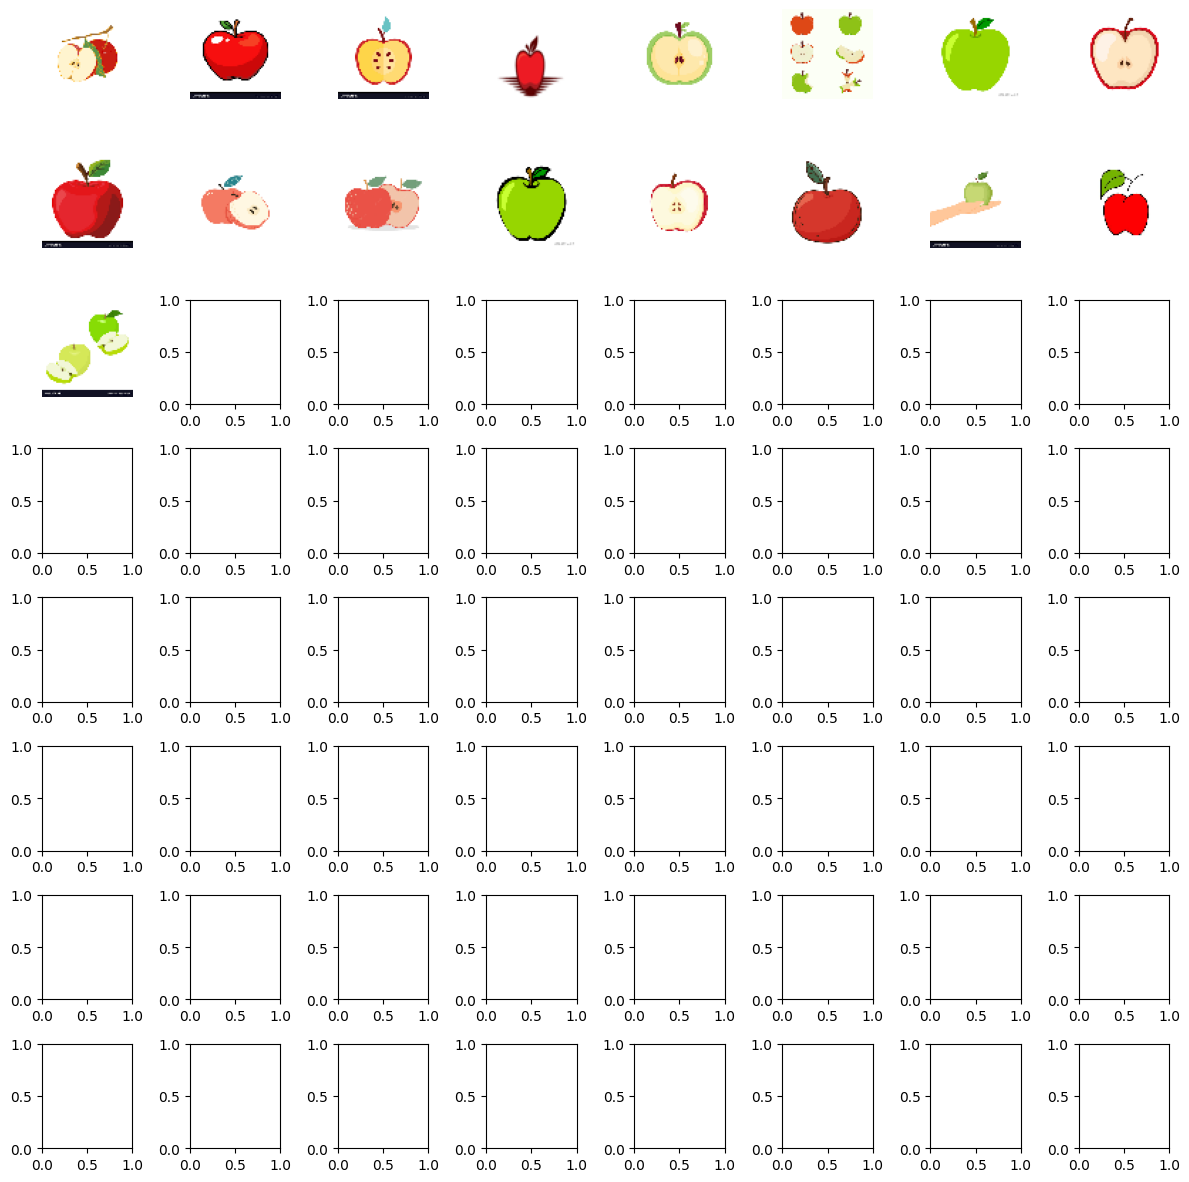

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Function to load images from a directory
def load_images_from_directory(directory_path, image_size=(64, 64)):
    images = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other formats if needed
            img_path = os.path.join(directory_path, filename)
            img = Image.open(img_path).resize(image_size)
            images.append(img)
            if len(images) == 64:  # Stop after 64 images
                break
    return images

# Function to display images in an 8x8 grid
def display_images_in_grid(images, grid_size=(8, 8)):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 12))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')  # Hide the axes ticks

    plt.tight_layout()
    plt.show()

# Directory containing images
directory_path = '/content/fruit-classification/Fruits Classification/train/Apple'

# Load images
images = load_images_from_directory(directory_path)

# Display images in an 8x8 grid
display_images_in_grid(images)

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128,128,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation = 'relu', input_shape = ()),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-08-19 17:47:02--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   125MB/s    in 0.7s    

2024-08-19 17:47:03 (125 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#     '/content/fruit-classification/Fruits Classification/train',
#     target_size = (128,128),
#     batch_size = 128,
#     class_mode = 'binary'

# )
local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)
pretrained_model.load_weights(local_weight_file)

# freezing of weights
for layers in pretrained_model.layers:
  layers.trainable = False




In [ ]:
# # history = model.fit(train_generator, steps_per_epoch = 8, epochs = 30, verbose = 1)
last_layer = pretrained_model.get_layer('mixed7')
# print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
# model.save('my_fruit_model.h5')
from keras import Model
from keras import layers
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(5, activation='sigmoid')(x)

model = Model(pretrained_model.input, x)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 47,516,581 (181.26 MB)

 Trainable params: 38,541,317 (147.02 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# import numpy as np
# from google.colab import files
# from tensorflow.keras.utils import load_img, img_to_array
# from tensorflow.keras.models import load_model

# # Upload files
# uploaded = files.upload()

# # Load your pre-trained model
# model = load_model('my_fruit_model.h5')

# # Define the class names
# class_names = ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'] # Update with your class names

# for fn in uploaded.keys():

#     # Predicting images
#     path = '/content/' + fn
#     img = load_img(path, target_size=(128, 128))
#     x = img_to_array(img)
#     x /= 255.0
#     x = np.expand_dims(x, axis=0)

#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     predicted_class = np.argmax(classes[0])

#     print(f"{fn} is a {class_names[predicted_class]}")

In [ ]:
#For Train images
base_dir = '/content/fruit-classification/Fruits Classification'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with our training pictures
train_apple_dir = os.path.join(train_dir, 'Apple')
train_banana_dir = os.path.join(train_dir, 'Banana')
train_grape_dir = os.path.join(train_dir, 'Grape')
train_mango_dir = os.path.join(train_dir, 'Mango')
train_strawberry_dir = os.path.join(train_dir, 'Strawberry')

#Directory with our validation immages
validation_apple_dir = os.path.join(validation_dir, 'Apple')
validation_banana_dir = os.path.join(validation_dir, 'Banana')
validation_grape_dir = os.path.join(validation_dir, 'Grape')
validation_mango_dir = os.path.join(validation_dir, 'Mango')
validation_strawberry_dir = os.path.join(validation_dir, 'Strawberry')




In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150))

Found 9700 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_Epoch_End(self, epoch, logs={}):
    if logs.get('accuracy')>0.95:
      print("\nReached 95%+ accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = mycallback()


In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 200ms/step - accuracy: 0.4553 - loss: 1.2201 - val_accuracy: 0.6950 - val_loss: 0.2628
Epoch 2/20
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7472 - loss: 0.2753

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.6776 - loss: 0.3125 - val_accuracy: 0.7650 - val_loss: 0.2221
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.7280 - loss: 0.2606 - val_accuracy: 0.8150 - val_loss: 0.1836
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.7146 - loss: 0.2595 - val_accuracy: 0.8050 - val_loss: 0.1856
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.7452 - loss: 0.2351 - val_accuracy: 0.8000 - val_loss: 0.1963
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.7608 - loss: 0.2283 - val_accuracy: 0.8000 - val_loss: 0.1949
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.7706 - loss: 0.2238 - val_accuracy: 0.8000 - val_loss: 0.1823
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.7581 - loss: 0.2273 - val_accuracy: 0.8000 - val_loss: 0.1779
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.7670 - loss: 0.2218 - val

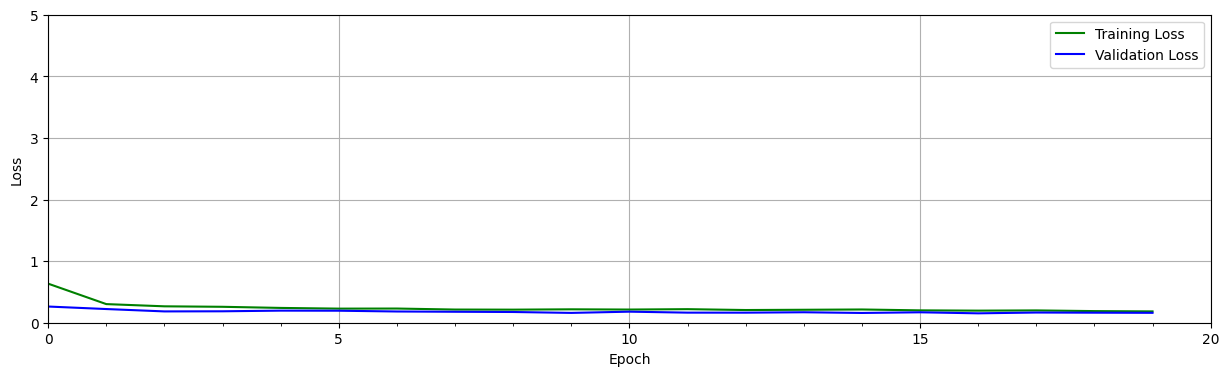

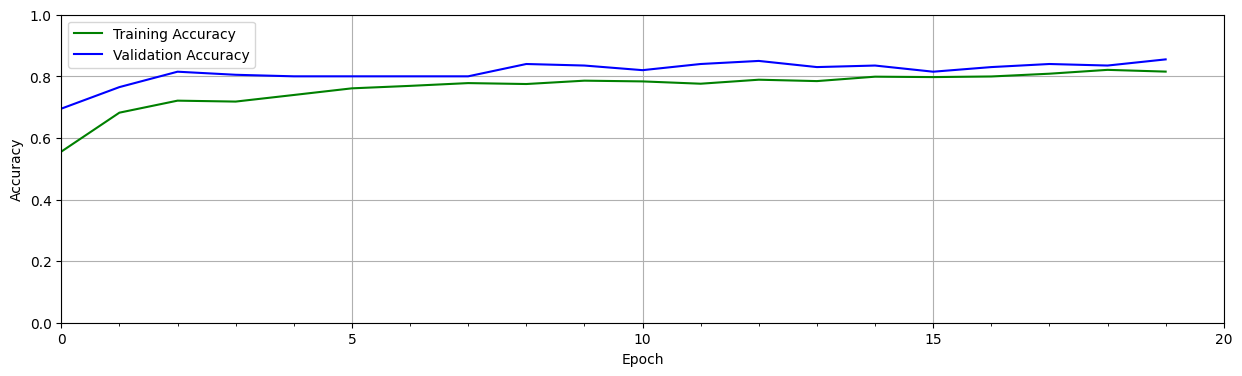

In [ ]:
# prompt: give me code to plot the training results
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np

def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)


Saving pexels-pixabay-60021.jpg to pexels-pixabay-60021.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


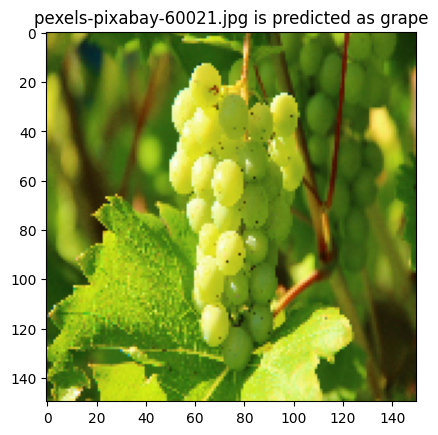

apple: 0.0022
banana: 0.0012
grape: 0.8916
mango: 0.1398
strawberry: 0.0001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files

# Define the function to show the uploaded image and its predicted results
def show_uploaded_image_and_result(uploaded):
    class_names = ['apple', 'banana', 'grape', 'mango', 'strawberry']

    for fn in uploaded.keys():
        # Save the uploaded file to the current directory
        path = fn
        with open(path, 'wb') as f:
            f.write(uploaded[fn])

        # Load and preprocess the image
        img = load_img(path, target_size=(150, 150))
        x = img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Predict the class of the image
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        predicted_class = np.argmax(classes[0])

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"{fn} is predicted as {class_names[predicted_class]}")
        plt.show()

        # Display the probability for each class
        for i, probability in enumerate(classes[0]):
            print(f"{class_names[i]}: {probability:.4f}")

# Upload files
uploaded = files.upload()
show_uploaded_image_and_result(uploaded)
